# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
df_final = pd.read_csv(r'D:\BUE\GP\testing\Final_CORD_19_data.csv')

In [4]:
df_final.shape

(22301, 7)

In [5]:
def inspect_data(data):
    return pd.DataFrame(
        {
            "Data Types": data.dtypes,
            'No of levels': data.apply(lambda x:len(x.unique()),axis = 0),
            'levels': data.apply(lambda x: x.unique(),axis = 0),
            'qtd_null': data.apply(lambda x:x.isnull().sum(),axis = 0),
            'pct_null': data.apply(lambda x:x.isnull().sum() * 100 / len(x))
        }
    )

In [6]:
inspect_data(df_final)

Data Types  No of levels  \
sha              object         22301   
title            object         22273   
abstract         object         22247   
publish_time     object          2857   
authors          object         22110   
url              object         22301   
body_text        object         22268   

                                                         levels  qtd_null  \
sha           [bb9e6ed5c0e9de74bfd98b8311b446cb3d9384bf, 758...         0   
title         [SARS-CoV-2 Infection in Kidney Transplant Rec...         0   
abstract      [INTRODUCTION: The second wave of COVID-19 has...         0   
publish_time  [2021-11-05, 2021-09-05, 2022-04-18, 2021-05-2...         0   
authors       [Tatapudi, Ravi Raju; Kopparti, Venkateswara R...       114   
url           [https://www.ncbi.nlm.nih.gov/pubmed/34745662/...         0   
body_text     [Severe acute respiratory syndrome corona viru...         0   

              pct_null  
sha           0.000000  
title         0.000000  
abstract      0.000000  
publish_time  0.000000  
authors       0.511188  
url           0.000000  
body_text     0.000000

In [7]:
df_final['publish_time'] = pd.to_datetime(df_final['publish_time'])

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22301 entries, 0 to 22300
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sha           22301 non-null  object        
 1   title         22301 non-null  object        
 2   abstract      22301 non-null  object        
 3   publish_time  22301 non-null  datetime64[ns]
 4   authors       22187 non-null  object        
 5   url           22301 non-null  object        
 6   body_text     22301 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.2+ MB


In [9]:
df_final['publish_year'] = df_final['publish_time'].dt.year
df_final['publish_month'] = df_final['publish_time'].dt.month
df_final['publish_day'] = df_final['publish_time'].dt.day

In [10]:
df_final['publish_year'].nunique()

51

In [11]:
df_final['publish_month'].nunique()

12

In [12]:
df_final['publish_day'].nunique()

31

In [13]:
df_final['publish_year'].sort_values(ascending=False)

11150    2022
9805     2022
9869     2022
9866     2022
9859     2022
         ... 
14442    1973
4392     1973
4965     1972
11512    1970
7486     1964
Name: publish_year, Length: 22301, dtype: int64

<AxesSubplot:xlabel='publish_year', ylabel='count'>

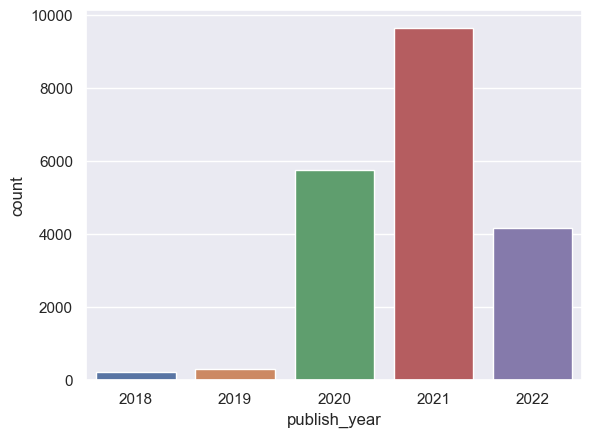

In [14]:
sns.countplot(
    x = 'publish_year', data = df_final[df_final['publish_year'].isin([2018,2019,2020,2021,2022,2023])]
)

<AxesSubplot:xlabel='publish_month', ylabel='count'>

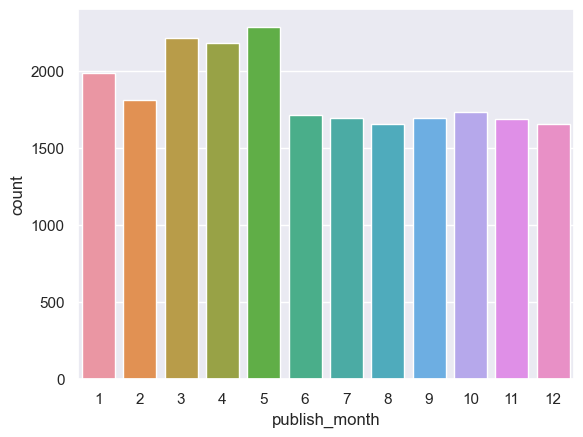

In [15]:
sns.countplot(
    x = 'publish_month', data = df_final
)

# Wordclouds : the most words appearing!

In [16]:
from wordcloud import WordCloud,STOPWORDS
import re
import string

In [17]:
def plot_word_cloud(wordcloud):
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis('off')

In [18]:
def remove_special_charac_and_punctuation(text):
    pattern = r'[^a-zA-Z0-9\'\s]'
    txt = re.sub(pattern,'',text)
    txt = "".join([c for c in txt if c not in string.punctuation])
    return txt

In [19]:
clean_abstract = df_final.loc[df_final.abstract.notnull(),'abstract'].apply(remove_special_charac_and_punctuation)

In [20]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = " ".join(tx.split())
        all_tokens += tx + ' '
    return all_tokens

In [21]:
abstract_tokens = concat_all_sentences(clean_abstract)

In [22]:
abstract_wordcloud = WordCloud(width = 500, height = 500, random_state=10).generate(abstract_tokens)

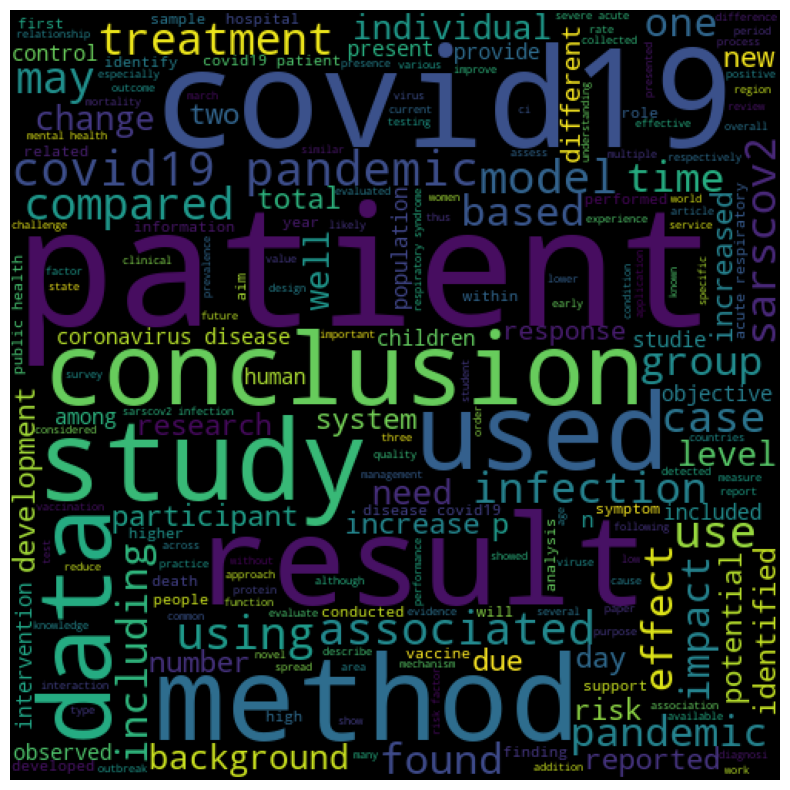

In [23]:
plot_word_cloud(abstract_wordcloud)

## Topic modeling
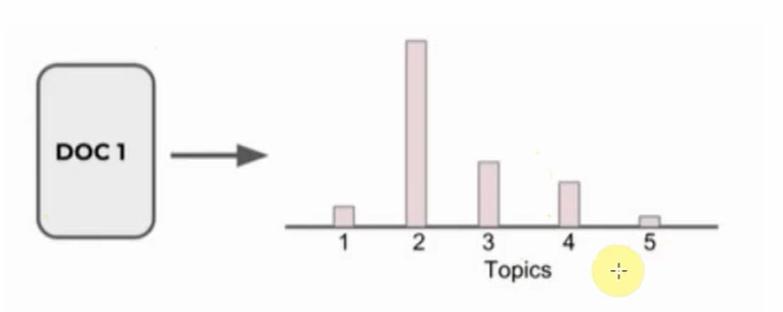
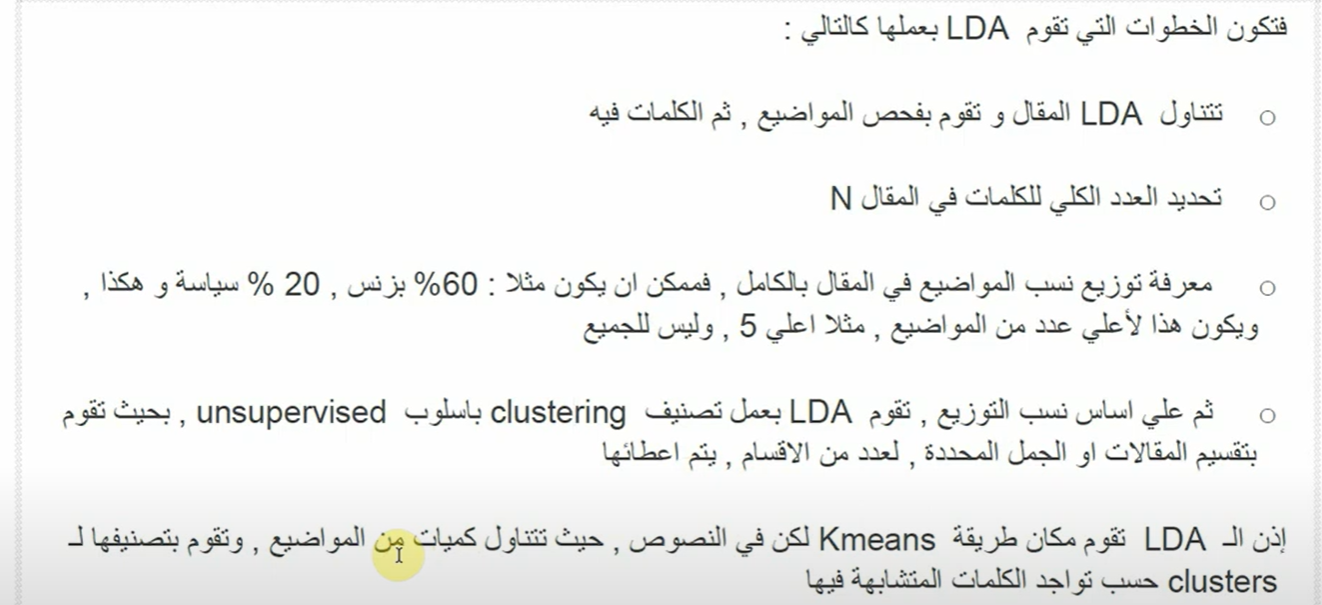

In [24]:
import gensim,spacy,logging,warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [25]:
abstracts = clean_abstract.values.tolist()

In [26]:
simple_preprocess("Mr HOSSAM No 1 ##",deacc=True)

['mr', 'hossam', 'no']

In [27]:
def token_builder(sentences):
    for sent in sentences:
        sent = simple_preprocess(str(sent),deacc=True)
        yield(sent)

In [28]:
abstract_tokens = list(token_builder(abstracts))

In [29]:
abstract_tokens

[['introduction',
  'the',
  'second',
  'wave',
  'of',
  'covid',
  'has',
  'spread',
  'across',
  'india',
  'causing',
  'unprecedented',
  'misery',
  'to',
  'people',
  'since',
  'march',
  'kidney',
  'transplant',
  'recipients',
  'ktrs',
  'are',
  'at',
  'an',
  'increased',
  'risk',
  'of',
  'severe',
  'infection',
  'their',
  'outcomes',
  'appear',
  'to',
  'be',
  'worse',
  'than',
  'those',
  'in',
  'the',
  'general',
  'population',
  'there',
  'is',
  'no',
  'robust',
  'evidence',
  'or',
  'consensus',
  'to',
  'support',
  'any',
  'form',
  'of',
  'treatment',
  'protocol',
  'or',
  'modification',
  'of',
  'in',
  'ktrs',
  'with',
  'covid',
  'there',
  'is',
  'need',
  'to',
  'develop',
  'effective',
  'and',
  'safe',
  'therapeutic',
  'protocols',
  'for',
  'this',
  'frail',
  'population',
  'remdesivir',
  'is',
  'the',
  'only',
  'approved',
  'antiviral',
  'drug',
  'in',
  'covid',
  'till',
  'now',
  'methods',
  'we',
  '

In [30]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(abstract_tokens,min_count=3,threshold=50)
trigram = gensim.models.Phrases(bigram[abstract_tokens],threshold=50)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram) 

In [31]:
import nltk

In [32]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hossam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hossam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [34]:
nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])

In [35]:
def process_docs(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    # nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization   
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out] 
    return texts_out

In [36]:
abstracts_data = process_docs(abstract_tokens)

In [37]:
id2word = corpora.Dictionary(abstracts_data)

In [38]:
id2word

In [39]:
print(id2word)

Dictionary(67613 unique tokens: ['administer', 'aki', 'antiviral', 'appear', 'approve']...)


In [40]:
corpus= [id2word.doc2bow(text) for text in abstracts_data]

In [41]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [42]:
print(lda_model.print_topics())

[(0, '0.023*"covid" + 0.018*"patient" + 0.012*"study" + 0.007*"result" + 0.007*"pandemic" + 0.005*"health" + 0.005*"method" + 0.005*"include" + 0.005*"datum" + 0.005*"child"'), (1, '0.013*"sarscov" + 0.012*"infection" + 0.009*"virus" + 0.008*"disease" + 0.008*"cell" + 0.006*"study" + 0.006*"show" + 0.006*"human" + 0.005*"result" + 0.005*"treatment"')]


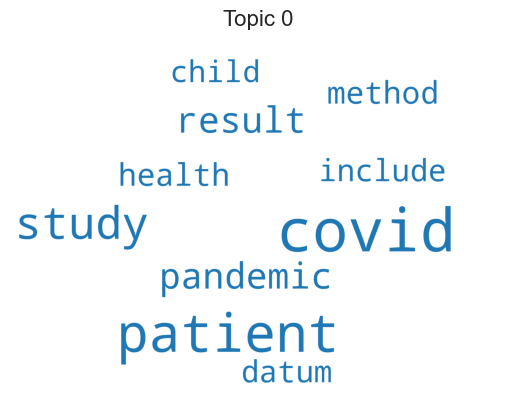

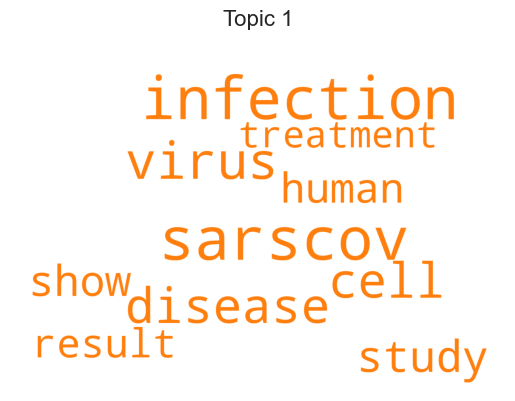

In [43]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

for i in range(0,2):
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    plt.show()

In [44]:
topics[0]

(0,
 [('covid', 0.02259738),
  ('patient', 0.017688751),
  ('study', 0.012119046),
  ('result', 0.0074085705),
  ('pandemic', 0.007406007),
  ('health', 0.0054213395),
  ('method', 0.0053752116),
  ('include', 0.0052348846),
  ('datum', 0.0051513533),
  ('child', 0.005050184)])

In [45]:
topics[1]

(1,
 [('sarscov', 0.012516906),
  ('infection', 0.012236477),
  ('virus', 0.008927464),
  ('disease', 0.00813858),
  ('cell', 0.008085026),
  ('study', 0.0064749606),
  ('show', 0.006142781),
  ('human', 0.0057166093),
  ('result', 0.005352804),
  ('treatment', 0.004574613)])

In [51]:
#Checking % of papers published in recent times vs in earlier years
df_final['in_covid_time'] = np.where(df_final['publish_year'].isin([2019,2020,2021]), 1, 0)
df_final['in_covid_time'].value_counts()

1    15710
0     6591
Name: in_covid_time, dtype: int64

c:\Users\Hossam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='in_covid_time', ylabel='count'>

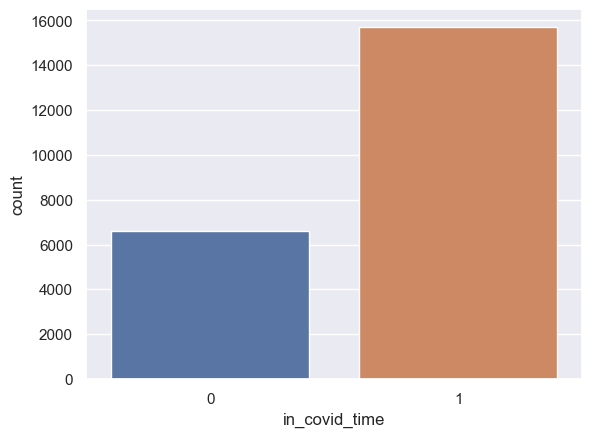

In [52]:
sns.countplot(df_final['in_covid_time'])